In [18]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go # visualize point clouds
import cv2

## Filestructure
You can download the data in the LiDAR/RADAR moodle course (Dataset2022): https://elearning.rwu.de/course/view.php?id=2344.  
The downloaded file is a zip, to use it you have to unzip it.  
After unzipping you will find two folders in _Dataset2022_ you will find two folders:
* _record1_ - forth and back drive of the car (240 Frames)
* _record2_ - right to left drive of the car (100 Frames)

Inside every recording folder you find 5 folders:
* _blickfeld_ - containing the data from the Blickfeld Cube (.csv files)
* _camera_ - containing the data from the camera (.jpg files)
* _groundtruth_ - containing the data for the bounding box around the vehicel (.csv files)
* _radar_ - containing the data from the Texas Instruments RADAR (.csv files)
* _velodyne_ - containing the data from the Velodyne Puck (.csv files)

So we can set pathes to the data:

In [19]:
record_number = 1 # Either record 1 or record 2

root = f"./Dataset2022/record{record_number}/"
path_blickfeld = f"{root}/blickfeld"
path_camera = f"{root}/camera"
path_groundtruth = f"{root}/groundtruth"
path_radar = f"{root}/radar"
path_velodyne = f"{root}/velodyne"

### Loading the data
To work with the data we have to load it into our python script. The data here are either .jpg files or .csv files. There are multiple ways to load these types of files. We will present here one way.
#### Loading .csv files
CSV is an acronym for Comma-Separated Values. While typically commas are used to seperate the values, they can also be seperated by whitespace or other symbols. In our files the data is seperated by whitespaces. Hence, for loading the data we will use the numpy function loadtxt (https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html). Because of the given datastructure, we can use the default parameters of loadtxt and just have to give the file path.  
As .csv files are the point clouds stored and the groundtruth.
#### Loading .jpg files
JPG files contain an compressed digital image. To load this we will use here a the function imread from cv2 (https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56). The function also just takes the image path.

In [20]:
def readPC(path):
    """
       Will return a numpy array of
       shape:
       Nx4 for LiDAR Data (x,y,z,itensity)
       Nx5 for RADAR Data (x,y,z,velocity,itensity)
       
    """
    return np.loadtxt(path)

def readImage(path):
    """
       Will return an numpy array of
       shape height x width x 3.
    """
    return cv2.imread(path)#[:,:,[2,1,0]]

def readLabels(path):
    """
       Reads the ground truth labels.
       In the labels are the following
       information stored:
       1. width in m
       2. length in m
       3. height in m
       4.-6. Coordinates of the center in m
       7. yaw rotation in degree
    """
    return np.loadtxt(path)

In [21]:
frame_id = 72
assert (record_number == 1 and frame_id < 240) or (record_number == 2 and frame_id < 100), \
    "Record number 1 only has 240 frames and"\
    " record number 2 only has 100 frames."
pc_blick = readPC(f"{path_blickfeld}/{frame_id:06d}.csv")
pc_velo = readPC(f"{path_velodyne}/{frame_id:06d}.csv")
pc_radar = readPC(f"{path_radar}/{frame_id:06d}.csv")
label = readLabels(f"{path_groundtruth}/{frame_id:06d}.csv")
img = readImage(f"{path_camera}/{frame_id:06d}.jpg")

In [22]:
print(f"Blickfeld point cloud shape: {pc_blick.shape}\n\
Velodyne point cloud shape: {pc_velo.shape}\n\
Radar point cloud shape: {pc_radar.shape}\n\
Label data shape: {label.shape}\n\
Image shape: {img.shape}")

Blickfeld point cloud shape: (3064, 4)
Velodyne point cloud shape: (16024, 4)
Radar point cloud shape: (177, 5)
Label data shape: (7,)
Image shape: (720, 1280, 3)


In [23]:
pc_blick

array([[35.34660721, 50.80399323,  4.40298605, 21.        ],
       [35.34660721, 50.80399323,  4.40298605, 21.        ],
       [22.45779228, 51.57144165,  4.510396  , 21.        ],
       ...,
       [34.01571274, 52.51858139,  4.3429966 , 19.        ],
       [34.55115509, 51.763237  ,  4.28952694, 29.        ],
       [34.88289642, 51.48035431,  4.27068996, 37.        ]])

In [24]:
pc_velo

array([[ 1.53192785e-02,  2.25055504e+00, -6.03048384e-01,
         1.90000000e+01],
       [ 1.81973740e-01,  2.60653934e+01,  4.54984248e-01,
         1.29000000e+02],
       [ 1.83792114e-02,  2.56837368e+00, -5.92970967e-01,
         1.70000000e+01],
       ...,
       [ 2.39103641e-02,  5.70814562e+00, -4.99402404e-01,
         9.00000000e+00],
       [ 3.74402553e-02,  8.25059223e+00, -4.32399660e-01,
         2.00000000e+00],
       [ 7.35855401e-02,  1.50575266e+01, -2.62833238e-01,
         2.00000000e+00]])

In [25]:
pc_radar

array([[ 7.91632831e-01,  2.54650745e+01, -4.62632561e+00,
        -1.80251002e+00,  1.72726078e+01],
       [ 4.02277052e-01,  2.58901005e+01, -2.01144606e-01,
        -1.80251002e+00,  1.72726078e+01],
       [-4.02277052e-01,  2.58901005e+01,  2.01144606e-01,
        -1.80251002e+00,  1.72726078e+01],
       [-1.57852161e+00,  2.53519421e+01,  5.02861500e+00,
        -1.80251002e+00,  1.72726078e+01],
       [ 8.14050972e-01,  2.61862164e+01,  6.10704064e-01,
        -1.80251002e+00,  1.82280674e+01],
       [ 3.99384975e-01,  2.57039700e+01,  5.08920050e+00,
        -1.80251002e+00,  1.82280674e+01],
       [-3.99384975e-01,  2.57039700e+01, -5.08920050e+00,
        -1.80251002e+00,  1.82280674e+01],
       [-8.02293420e-01,  2.58080025e+01, -4.47849655e+00,
        -1.80251002e+00,  1.82280674e+01],
       [-1.62854421e+00,  2.61553326e+01, -7.36664724e-15,
        -1.80251002e+00,  1.82280674e+01],
       [ 8.09519947e-01,  2.60404644e+01, -4.94379520e+00,
        -1.80251002e+00

In [26]:
label

array([ 3.19269836,  3.99680041,  1.59594526,  0.06185391, 26.59720666,
        0.60013417,  0.        ])

In [27]:
img

array([[[253, 255, 195],
        [253, 255, 195],
        [253, 255, 196],
        ...,
        [254, 255, 229],
        [254, 255, 229],
        [254, 255, 229]],

       [[253, 255, 195],
        [253, 255, 195],
        [253, 255, 196],
        ...,
        [254, 255, 229],
        [254, 255, 229],
        [254, 255, 229]],

       [[253, 255, 195],
        [253, 255, 195],
        [253, 255, 196],
        ...,
        [254, 255, 229],
        [254, 255, 229],
        [254, 255, 229]],

       ...,

       [[100,  98,  80],
        [102, 100,  82],
        [101,  99,  81],
        ...,
        [ 78,  66,  62],
        [ 82,  70,  66],
        [ 93,  81,  77]],

       [[ 97,  95,  77],
        [100,  98,  80],
        [ 99,  97,  79],
        ...,
        [ 86,  74,  70],
        [ 91,  79,  75],
        [105,  93,  89]],

       [[ 93,  91,  73],
        [ 97,  95,  77],
        [ 98,  96,  78],
        ...,
        [ 97,  85,  81],
        [ 97,  85,  81],
        [105,  93,  89]]

## Visualization
To understand the data easier, we visualize them. We can use the package matplotlib.pyplot and/or plotly.

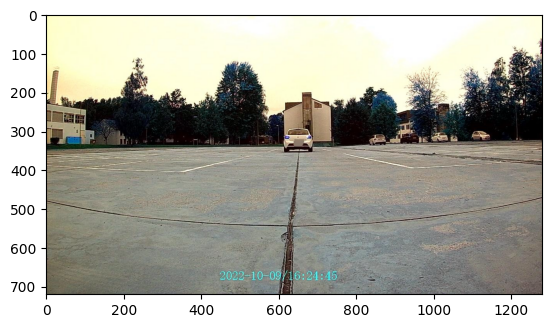

In [28]:
plt.imshow(img) # cv2 color order is (blue, green, red) 
                # and of matplotlib.pyplot is (red, green, blue)

In [29]:
def readImage(path):
    """
       Will return an numpy array of
       shape height x width x 3.
    """
    return cv2.imread(path)[:,:,[2,1,0]]

In [30]:
img = readImage(f"{path_camera}/{frame_id:06d}.jpg")

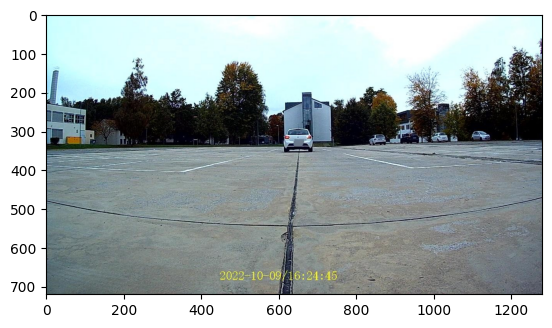

In [31]:
plt.imshow(img)

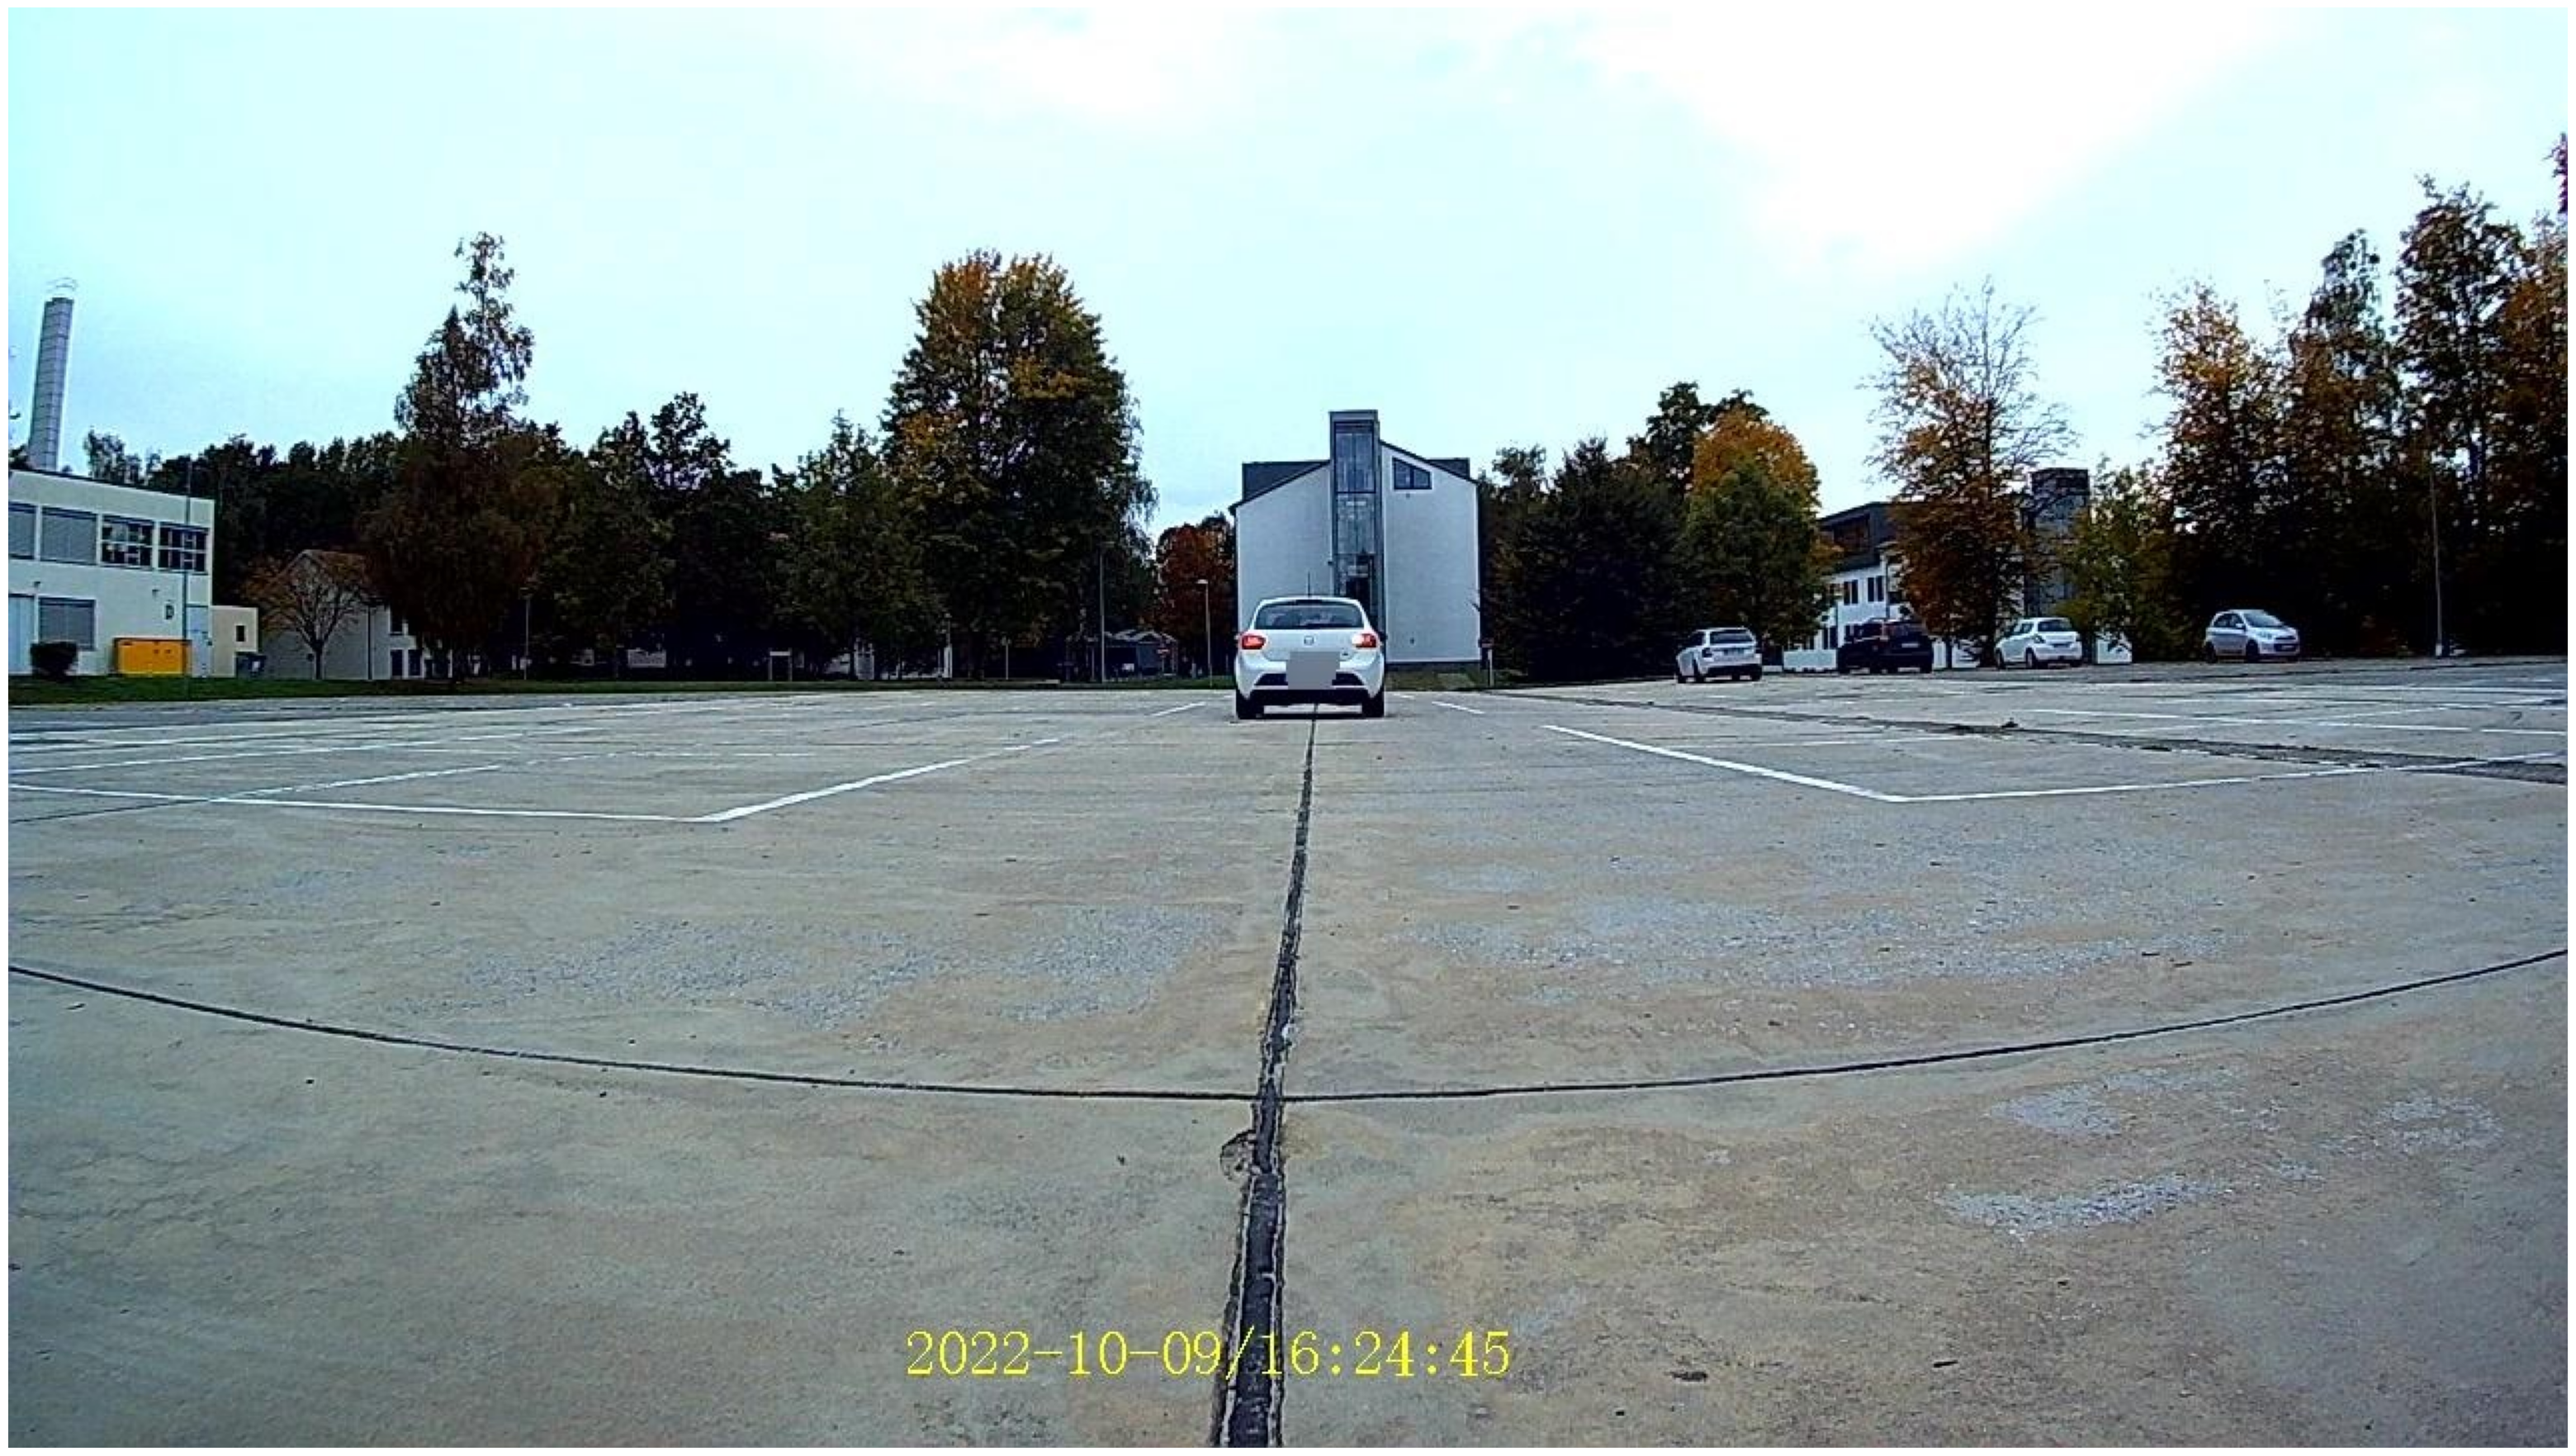

In [32]:
plt.figure(figsize=(40,30)) # Size of the Figure
plt.axis("off") # Deletes the axis
plt.imshow(img) 

Can use matplotlib.pyplot.scatter to visualize the point clouds, but only 2D.

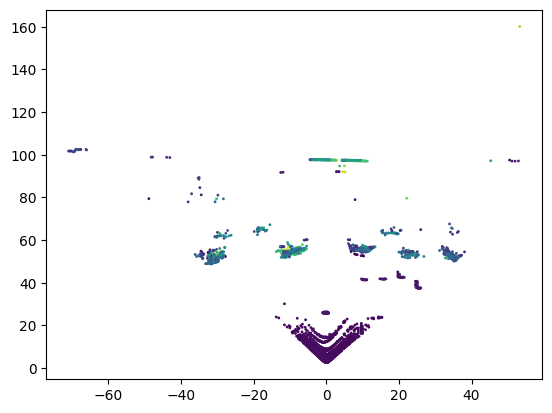

In [33]:
plt.scatter(pc_blick[:,0],pc_blick[:,1], s = 1, c = pc_blick[:,2])

For 3D we can use plotly.graph_objects:

In [34]:
data = [go.Scatter3d(x = pc_blick[:,0],
                     y = pc_blick[:,1],
                     z = pc_blick[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_blick.shape[0]),
                    marker={
                        'size': 2,
                        'color': pc_blick[:,2],
                        'colorscale':'rainbow',
})
]

go.Figure(data=data)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': array([4.40298605, 4.40298605, 4.510396  , ..., 4.3429966 , 4.28952694,
                                         4.27068996]),
                         'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125,
                                        'rgb(0,0,200)'], [0.25, 'rgb(0,25,255)'],
                                        [0.375, 'rgb(0,152,255)'], [0.5,
                                        'rgb(44,255,150)'], [0.625,
                                        'rgb(151,255,0)'], [0.75,
                                        'rgb(255,234,0)'], [0.875,
                                        'rgb(255,111,0)'], [1.0, 'rgb(255,0,0)']],
                         'size': 2},
              'mode': 'markers',
              'text': array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.061e+03, 3.062e+03, 3.063e+03]),
              'type': 'scatter3d',
              'x': array([35.34660721, 35.34660721, 22.45779228, ..., 34.01571274, 34.55115509,
                          34.88289642]),
              'y': array([50.80399323, 50.80399323, 51.57144165, ..., 52.51858139, 51.763237  ,
                          51.48035431]),
              'z': array([4.40298605, 4.40298605, 4.510396  , ..., 4.3429966 , 4.28952694,
                          4.27068996])}],
    'layout': {'template': '...'}
})

In [ ]:
data = [go.Scatter3d(x = pc_velo[:,0],
                     y = pc_velo[:,1],
                     z = pc_velo[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_velo.shape[0]),
                    marker={
                        'size': 2,
                        'color': pc_velo[:,2],
                        'colorscale':'rainbow',
})
]
go.Figure(data=data)

In [ ]:
data = [go.Scatter3d(x = pc_radar[:,0],
                     y = pc_radar[:,1],
                     z = pc_radar[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_radar.shape[0]),
                    marker={
                        'size': 2,
                        'color': pc_radar[:,2],
                        'colorscale':'rainbow',
})
]

go.Figure(data=data)

In [ ]:
data = [go.Scatter3d(x = pc_blick[:,0],
                     y = pc_blick[:,1],
                     z = pc_blick[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_blick.shape[0]),
                    marker={
                        'size': 2,
                        'color': pc_blick[:,2],
                        'colorscale':'rainbow',
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20]},
        'yaxis': {'range': [0, 40]},
        'zaxis': {'range': [-20., 20.]},
    }
                        
)
go.Figure(data=data,layout=layout)

In [ ]:
data = [go.Scatter3d(x = pc_velo[:,0],
                     y = pc_velo[:,1],
                     z = pc_velo[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_velo.shape[0]),
                    marker={
                        'size': 2,
                        'color': pc_velo[:,2],
                        'colorscale':'rainbow',
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20]},
        'yaxis': {'range': [0, 40]},
        'zaxis': {'range': [-20., 20.]},
    }
                        
)
go.Figure(data=data,layout=layout)

In [ ]:
data = [go.Scatter3d(x = pc_radar[:,0],
                     y = pc_radar[:,1],
                     z = pc_radar[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_radar.shape[0]),
                    marker={
                        'size': 2,
                        'color': pc_radar[:,2],
                        'colorscale':'rainbow',
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20]},
        'yaxis': {'range': [0, 40]},
        'zaxis': {'range': [-20., 20.]},
    }
                        
)
go.Figure(data=data,layout=layout)

In [ ]:
data = [go.Scatter3d(x = pc_blick[:,0],
                     y = pc_blick[:,1],
                     z = pc_blick[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_blick.shape[0]),
                    marker={
                        'size': 2,
                        'color': "green",
                        'colorscale':'rainbow',
}),
                go.Scatter3d(x = pc_velo[:,0],
                    y = pc_velo[:,1],
                    z = pc_velo[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_velo.shape[0]),
                    marker={
                        'size': 2,
                        'color': "yellow",
                        'colorscale':'rainbow',
}),     
                go.Scatter3d(x = pc_radar[:,0],
                    y = pc_radar[:,1],
                    z = pc_radar[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_radar.shape[0]),
                    marker={
                        'size': 2,
                        'color': "blue",
                        'colorscale':'rainbow',
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20], 'rangemode': 'tozero', 'tick0': -5},
        'yaxis': {'range': [0, 40], 'rangemode': 'tozero', 'tick0': -5},
        'zaxis': {'range': [-20., 20.], 'rangemode': 'tozero'}
    }
)
go.Figure(data=data, layout = layout)

In [ ]:
data = [go.Scatter3d(x = pc_blick[:,0],
                     y = pc_blick[:,1],
                     z = pc_blick[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_blick.shape[0]),
                    marker={
                        'size': 2,
                        'color': pc_blick[:,2],
                        'colorscale':'rainbow',
}),
        go.Scatter3d(x = [label[3]],
                     y = [label[4]],
                     z = [label[5]],
                    mode='markers', type='scatter3d',
                    marker={
                        'size': 5,
                        'color': "red",
                        'colorscale':'rainbow',
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20]},
        'yaxis': {'range': [0, 40]},
        'zaxis': {'range': [-20., 20.]},
    }
                        
)
go.Figure(data=data,layout=layout)

If we want to visualize the groundtruth properly, we have to transform the label such that we have the 8 corners of the bounding box.
The steps are the following:
1. Generate a box of the right dimension
2. Rotate the corners according to the yaw rotation
3. Translate the corners according to the center coordinates

In [ ]:
def rt_matrix(roll=0, pitch=0, yaw=0):
    """
        Returns a 3x3 Rotation Matrix. Angels in degree!
    """
    yaw = yaw * np.pi / 180
    roll = roll * np.pi / 180
    pitch = pitch * np.pi / 180
    c_y = np.cos(yaw)
    s_y = np.sin(yaw)
    c_r = np.cos(roll)
    s_r = np.sin(roll)
    c_p = np.cos(pitch)
    s_p = np.sin(pitch)
    
    # Rotationmatrix
    rot = np.dot(np.dot(np.array([[c_y, - s_y,   0],
                                  [s_y,   c_y,   0],
                                  [0,      0,    1]]),
                        np.array([[c_p,    0,    s_p],
                                  [0,      1,    0],
                                  [-s_p,   0,    c_p]])),
                        np.array([[1,      0,    0],
                                  [0,     c_r, - s_r],
                                  [0,     s_r,   c_r]]))
    return rot

def rotate_points(points, rot_t):
    """
        Input must be of shape N x 3
        Returns the rotated point cloud for a given roation matrix 
        and point cloud.
    """
    points[0:3,:] = np.dot(rot_t, points[0:3,:])
    return points

def make_boundingbox(label):
    """
        Returns the corners of a bounding box from a label.
    """
    corner = np.array([
        [+ label[0]/2, + label[1]/2, + label[2]/2],
        [+ label[0]/2, + label[1]/2, - label[2]/2],
        [+ label[0]/2, - label[1]/2, + label[2]/2],
        [+ label[0]/2, - label[1]/2, - label[2]/2],
        [- label[0]/2, + label[1]/2, + label[2]/2],
        [- label[0]/2, - label[1]/2, + label[2]/2],
        [- label[0]/2, + label[1]/2, - label[2]/2],
        [- label[0]/2, - label[1]/2, - label[2]/2],
    ])
    corner = rotate_points(corner.T, rt_matrix(yaw = label[6]))
    corner = corner.T + label[3:6]
    return corner

In [ ]:
bb = make_boundingbox(label)

# New bounding box for the visualization
bb = np.array([bb[0],bb[1],bb[3],bb[2],bb[0],bb[4],bb[5],
               bb[2],bb[3],bb[7],bb[5],bb[4],bb[6],bb[7],bb[6],bb[1]])

In [ ]:
data = [go.Scatter3d(x = pc_blick[:,0],
                     y = pc_blick[:,1],
                     z = pc_blick[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_blick.shape[0]),
                    marker={
                        'size': 2,
                        'color': "green",
                        'colorscale':'rainbow',
}),
                go.Scatter3d(x = pc_velo[:,0],
                    y = pc_velo[:,1],
                    z = pc_velo[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_velo.shape[0]),
                    marker={
                        'size': 2,
                        'color': "yellow",
                        'colorscale':'rainbow',
}),     
                go.Scatter3d(x = pc_radar[:,0],
                    y = pc_radar[:,1],
                    z = pc_radar[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_radar.shape[0]),
                    marker={
                        'size': 2,
                        'color': "blue",
                        'colorscale':'rainbow',
}),        
                go.Scatter3d(x = bb[:,0],
                    y = bb[:,1],
                    z = bb[:,2],
                    mode='lines', type='scatter3d',
                    line={
                        'width': 10,
                        'color': "red",
                        'colorscale':'rainbow'
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20], 'rangemode': 'tozero', 'tick0': -5},
        'yaxis': {'range': [0, 40], 'rangemode': 'tozero', 'tick0': -5},
        'zaxis': {'range': [-20., 20.], 'rangemode': 'tozero'}
    }
)
go.Figure(data=data, layout = layout)

In [ ]:
def get_sub_points_of_object(obj, pc):
    """
       Determines those points of the point cloud (pc)
       that are inside of the object (obj).
    """
    # 1. Get the bounding box corners.
    
    # 2. Rotate the data such that the edges of the
    #    bounding box is aligned with the axis.
    #    For this we rotate the point cloud and the 
    #    corners into the opposite direction than 
    #    stated by the yaw value from the groundtruth
    #    file. Calculate the inverse of the
    #    rotation matrix.

    # 3. We need for every dimension the minimal and
    #    maximal value of the corners.
    
    # 4. Only those points of the point cloud that are
    #    smaller than the maximum and larger than the 
    #    minimum in every dimension are inside the box.


In [ ]:
from getSubPoints import get_sub_points_of_object

In [ ]:
subpoints = get_sub_points_of_object(label, pc_blick[:,0:3])

In [ ]:
data = [go.Scatter3d(x = pc_blick[:,0],
                     y = pc_blick[:,1],
                     z = pc_blick[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_blick.shape[0]),
                    marker={
                        'size': 2,
                        'color': "green",
                        'colorscale':'rainbow',
}),
        go.Scatter3d(x = subpoints[1][:,0],
                     y = subpoints[1][:,1],
                     z = subpoints[1][:,2],
                    mode='markers', type='scatter3d',
                    marker={
                        'size': 2,
                        'color': "blue",
                        'colorscale':'rainbow',
}),
        go.Scatter3d(x = bb[:,0],
                     y = bb[:,1],
                     z = bb[:,2],
                    mode='lines', type='scatter3d',
                    line={
                        'width': 10,
                        'color': "red",
                        'colorscale':'rainbow'
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20], 'rangemode': 'tozero', 'tick0': -5},
        'yaxis': {'range': [0, 40], 'rangemode': 'tozero', 'tick0': -5},
        'zaxis': {'range': [-20., 20.], 'rangemode': 'tozero'}
    }
)
go.Figure(data=data, layout = layout)

In [ ]:
subpoints = get_sub_points_of_object(label, pc_velo[:,0:3])

In [ ]:
data = [go.Scatter3d(x = pc_velo[:,0],
                     y = pc_velo[:,1],
                     z = pc_velo[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_velo.shape[0]),
                    marker={
                        'size': 2,
                        'color': "green",
                        'colorscale':'rainbow',
}),
        go.Scatter3d(x = subpoints[1][:,0],
                     y = subpoints[1][:,1],
                     z = subpoints[1][:,2],
                    mode='markers', type='scatter3d',
                    marker={
                        'size': 2,
                        'color': "blue",
                        'colorscale':'rainbow',
}),
        go.Scatter3d(x = bb[:,0],
                     y = bb[:,1],
                     z = bb[:,2],
                    mode='lines', type='scatter3d',
                    line={
                        'width': 10,
                        'color': "red",
                        'colorscale':'rainbow'
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20], 'rangemode': 'tozero', 'tick0': -5},
        'yaxis': {'range': [0, 40], 'rangemode': 'tozero', 'tick0': -5},
        'zaxis': {'range': [-20., 20.], 'rangemode': 'tozero'}
    }
)
go.Figure(data=data, layout = layout)

In [ ]:
subpoints = get_sub_points_of_object(label, pc_radar[:,0:3])

In [ ]:
data = [go.Scatter3d(x = pc_radar[:,0],
                     y = pc_radar[:,1],
                     z = pc_radar[:,2],
                    mode='markers', type='scatter3d',
                    text=np.arange(pc_radar.shape[0]),
                    marker={
                        'size': 2,
                        'color': "green",
                        'colorscale':'rainbow',
}),
        go.Scatter3d(x = subpoints[1][:,0],
                     y = subpoints[1][:,1],
                     z = subpoints[1][:,2],
                    mode='markers', type='scatter3d',
                    marker={
                        'size': 2,
                        'color': "blue",
                        'colorscale':'rainbow',
}),
        go.Scatter3d(x = bb[:,0],
                     y = bb[:,1],
                     z = bb[:,2],
                    mode='lines', type='scatter3d',
                    line={
                        'width': 10,
                        'color': "red",
                        'colorscale':'rainbow'
})
]
layout = go.Layout(
    scene={
        'xaxis': {'range': [-20, 20], 'rangemode': 'tozero', 'tick0': -5},
        'yaxis': {'range': [0, 40], 'rangemode': 'tozero', 'tick0': -5},
        'zaxis': {'range': [-20., 20.], 'rangemode': 'tozero'}
    }
)
go.Figure(data=data, layout = layout)

In [ ]:
root = f"./Dataset2022/record1/"
pts_blick_rec1 = []
pts_velo_rec1 = []
pts_radar_rec1 = []
for i in range(240):
    pc_blick = readPC(f"{root}/blickfeld/{i:06d}.csv")
    pc_velo = readPC(f"{root}/velodyne/{i:06d}.csv")
    pc_radar = readPC(f"{root}/radar/{i:06d}.csv")
    label = readLabels(f"{root}/groundtruth/{i:06d}.csv")
    
    pts_blick_rec1 += [get_sub_points_of_object(label, pc_blick[:,0:3])[0].sum()]
    pts_velo_rec1 += [get_sub_points_of_object(label, pc_velo[:,0:3])[0].sum()]
    pts_radar_rec1 += [get_sub_points_of_object(label, pc_radar[:,0:3])[0].sum()]


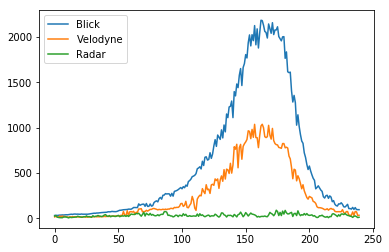

In [ ]:
plt.plot(pts_blick_rec1)
plt.plot(pts_velo_rec1)
plt.plot(pts_radar_rec1)
plt.legend(["Blick", "Velodyne", "Radar"])

In [ ]:
root = f"./Dataset2022/record2/"
pts_blick_rec2 = []
pts_velo_rec2 = []
pts_radar_rec2 = []
for i in range(100):
    pc_blick = readPC(f"{root}/blickfeld/{i:06d}.csv")
    pc_velo = readPC(f"{root}/velodyne/{i:06d}.csv")
    pc_radar = readPC(f"{root}/radar/{i:06d}.csv")
    label = readLabels(f"{root}/groundtruth/{i:06d}.csv")
    
    pts_blick_rec2 += [get_sub_points_of_object(label, pc_blick[:,0:3])[0].sum()]
    pts_velo_rec2 += [get_sub_points_of_object(label, pc_velo[:,0:3])[0].sum()]
    pts_radar_rec2 += [get_sub_points_of_object(label, pc_radar[:,0:3])[0].sum()]


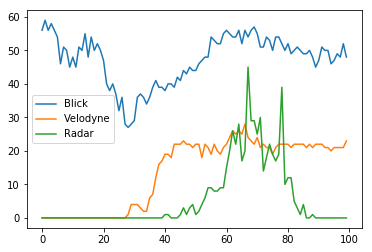

In [ ]:
plt.plot(pts_blick_rec2)
plt.plot(pts_velo_rec2)
plt.plot(pts_radar_rec2)
plt.legend(["Blick", "Velodyne", "Radar"])